<a href="https://colab.research.google.com/github/Gyanendra079/Capstone-project-2/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement** Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance.Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonsonality and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


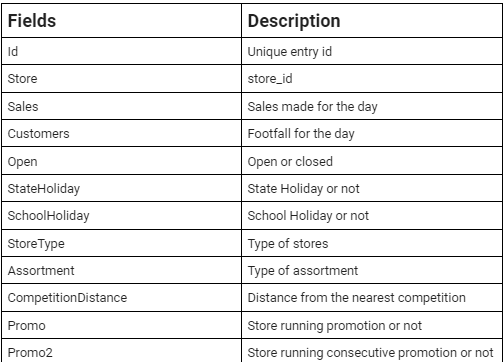

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [225]:
# Import Libraries
import pandas as pd
import numpy as np

#Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
import warnings    
warnings.filterwarnings('ignore')

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [227]:
# Load Dataset
rossman_df = pd.read_csv("/content/drive/MyDrive/almabetter/capstone projects/Capstone Project 2/Rossmann Stores Data.csv")
store_df = pd.read_csv('/content/drive/MyDrive/almabetter/capstone projects/Capstone Project 2/Copy of store.csv')

### Dataset First View

In [228]:
# Dataset First Look
#retail store data
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [229]:
#store data
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [230]:
# Dataset Rows & Columns count
rossman_df.shape

(1017209, 9)

No. of rows in Rossmann store dataset are 1017209 and columns are 9.

In [231]:
store_df.shape

(1115, 10)

No. of rows in store dataset are 1115 and columns are 10.

### Dataset Information

In [232]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [233]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Missing Values/Null Values

In the Rossmann store data CompetitionDistance 3 null values,CompetitionOpenSinceMonth & CompetitionOpenSinceYear 354 null values and Promo2SinceWeek,Promo2SinceYear,PromoInterval 544 null values.

In [235]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


All null are replaced with 0.

#### Duplicate Values

In [236]:
# Dataset Duplicate Value Count
rossman_df.duplicated(subset=None, keep='first')

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [237]:
store_df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

No duplicates values are found in the dataset

### Information regarding the dataset

#Data Description
#Rossmann Stores Data.csv - historical data including Sales
#store.csv - supplemental information about the stores
#<b>Data fields<b>
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

#1.Id - an Id that represents a (Store, Date) duple within the test set
#2.Store - a unique Id for each store
#3.Sales - the turnover for any given day (this is what you are predicting)
#4.Customers - the number of customers on a given day
#5.Open - an indicator for whether the store was open: 0 = closed, 1 = open
#6.StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
#7.SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
#8.StoreType - differentiates between 4 different store models: a, b, c, d
#9.Assortment - describes an assortment level: a = basic, b = extra, c = extended
#10.CompetitionDistance - distance in meters to the nearest competitor store
#11.CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
#12.Promo - indicates whether a store is running a promo on that day
#13.Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
#14.Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
#15.PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




















## ***2. Understanding Your Variables***

In [238]:
# Dataset Columns
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [239]:
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [240]:
# Dataset Describe
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5390.358744,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7657.973705,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2320.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [241]:
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Check Unique Values for each variable.

In [242]:
# Check Unique Values for each variable.
print(rossman_df.DayOfWeek.unique())
print(rossman_df.Open.unique())	
print(rossman_df.Promo.unique())
print(rossman_df.StateHoliday.unique())
print(rossman_df.SchoolHoliday.unique())

[5 4 3 2 1 7 6]
[1 0]
[1 0]
['0' 'a' 'b' 'c' 0]
[1 0]


In [243]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [244]:
#Various type of column with different values
print(store_df.StoreType.unique())
print(store_df.Assortment.unique())
print(store_df.CompetitionOpenSinceMonth.unique())
print(store_df.CompetitionOpenSinceYear.unique())
print(store_df.Promo2.unique())
print(store_df.Promo2SinceWeek.unique())
print(store_df.	Promo2SinceYear.unique())
print(store_df.PromoInterval.unique())

['c' 'a' 'd' 'b']
['a' 'c' 'b']
[ 9. 11. 12.  4. 10.  8.  0.  3.  6.  5.  1.  2.  7.]
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.    0. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
[0 1]
[ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
[   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


## 3. ***Data Wrangling***

# Filling the null values with 0.

In [291]:
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)
store_df['Promo2SinceWeek'].fillna(0, inplace = True)
store_df['Promo2SinceYear'].fillna(0, inplace = True)
store_df['PromoInterval'].fillna(0, inplace = True)

In [292]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [294]:
rossman_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [297]:
rossman_df["Date"]=pd.to_datetime(rossman_df["Date"])
rossman_df["Year"]=rossman_df["Date"].dt.year
rossman_df["Month"]=rossman_df["Date"].dt.month
rossman_df["Day"]=rossman_df["Date"].dt.day
rossman_df["Week"]=rossman_df["Date"].dt.week%4
rossman_df["WeekOfYear"]=rossman_df["Date"].dt.week

In [298]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31


In [299]:
df = rossman_df.merge(store_df, how='outer', on=['Store'])

In [300]:
print(df[df['StoreType'] == 'a']['Sales'].mean())
print(df[df['StoreType'] == 'b']['Sales'].mean())
print(df[df['StoreType'] == 'c']['Sales'].mean())
print(df[df['StoreType'] == 'd']['Sales'].mean())

5738.179710202728
10058.837334175616
5723.6292458345515
5641.819243109884


In [301]:
df_copy = df.copy()

In [302]:
df_copy.drop(['Date'], axis = 1, inplace = True)

In [303]:
df_copy['CompetitionOpen'] = 0
df_copy['PromoOpen'] = 0

In [304]:
df_copy['CompetitionOpen'] = (df_copy['CompetitionOpen'].where(df_copy['CompetitionOpenSinceYear'] == 0, other= (12 * (df_copy['Year'] - df_copy['CompetitionOpenSinceYear'])) + (df_copy['Month'] - df_copy['CompetitionOpenSinceMonth'])))
df_copy['PromoOpen'] = ( 12 * (df_copy['Year'] - df_copy['Promo2SinceYear'])) + df_copy['Month'] - ((df_copy['Promo2SinceWeek']/4))

In [305]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Day                        1017209 non-null  int64  
 11  Week                       1017209 non-null  int64  
 12  WeekOfYear                 1017209 non-null  int64  
 13  StoreType   

In [306]:
df_copy[df_copy['PromoOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
17926,20,1,9229,954,1,1,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17927,20,7,0,0,0,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17928,20,6,5572,566,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17929,20,5,7149,839,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17930,20,4,8118,997,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013436,1111,6,3325,291,1,0,0,0,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013437,1111,5,4640,453,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013438,1111,4,4579,444,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013439,1111,3,5097,505,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75


In [307]:
#We can make these negative value of promo equal to zero since no promo is given in these store
df_copy.loc[df_copy['PromoOpen'] <0, 'PromoOpen' ] = 0

In [308]:
df_copy[df_copy['PromoOpen'] <0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [309]:
# again applying the same thing for CompetitionOpen
df_copy.loc[df_copy['CompetitionOpen'] <0, 'CompetitionOpen' ] = 0
df_copy[df_copy['CompetitionOpen'] <0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

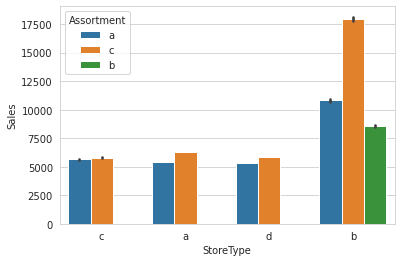

In [245]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x= df["StoreType"],y= df['Sales'],hue= df["Assortment"])

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores

**Sales vs customer**

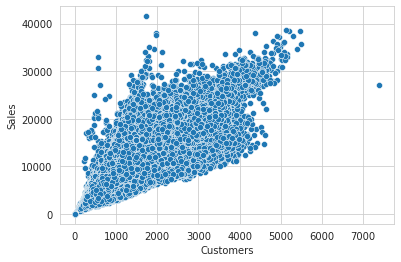

In [246]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

From the above plot we can say that as the no. of customer increases the sales also increases.

In [247]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


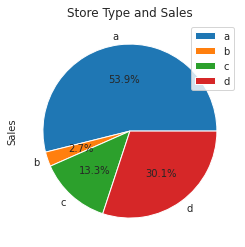

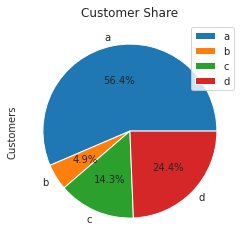

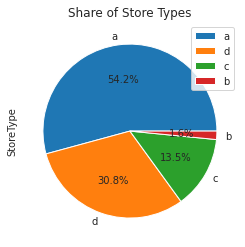

In [248]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%')
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%')
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%')
plt.show()

First two pie shows the sales and customers data on the basis of various store type.Two type of conclusion we can draw from them are:-

*   Type a has the maximum share in both of them
*   Type b has the minimum share in both of them

In terms total store type order in descending format is a,d,c and b



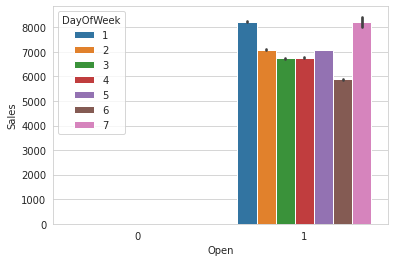

In [249]:
# open and storetype relationship 
#It suggests that whether the store was open or closed for refurbishment on weekends and holidays
sns.barplot(x=rossman_df["Open"],y=rossman_df['Sales'],hue=rossman_df["DayOfWeek"])

Monday and Sunday are the two most days where refurbishment occurs more times since they starting and ending of the week so store are busy in picking up the pace and cleaning the store more often.

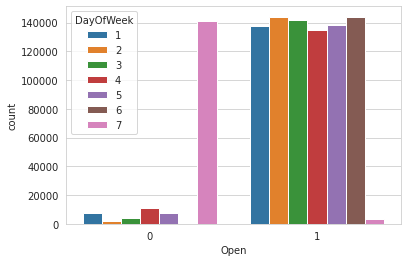

In [250]:
#Lets see open, how many shops are open on which days 
#It gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=rossman_df["Open"], hue=rossman_df["DayOfWeek"])

Here we can clearly see two category 0 means close and sunday has highest value and 1 means open and sunday has very low value in this category.

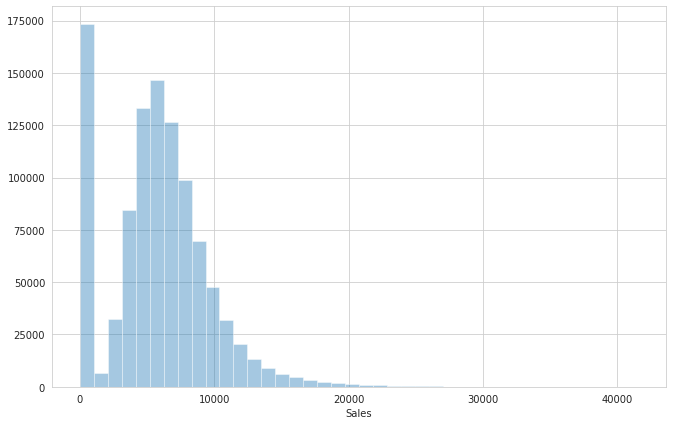

In [251]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
#distribution plot for sales in rossmann store data
sns.distplot(rossman_df['Sales'], kde = False,bins=40);

Sales are larges in the 0-1,000 range then, it is rightly skewed in range 1,000-20,000

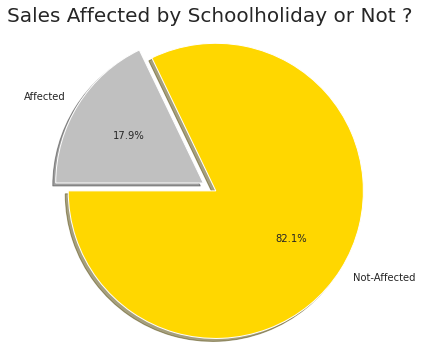

In [252]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()                           #get the current figure
fig.set_size_inches(6,6)
plt.show()

Here the sales affected by schoolholiday is approx. 18% which tells us that during that day its commodities bought are less in comparison to other days when school are open.

#Correlation Heatmap

In [253]:
#Merging the two dataset on left join
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


**Correlation Matrix:**
Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all

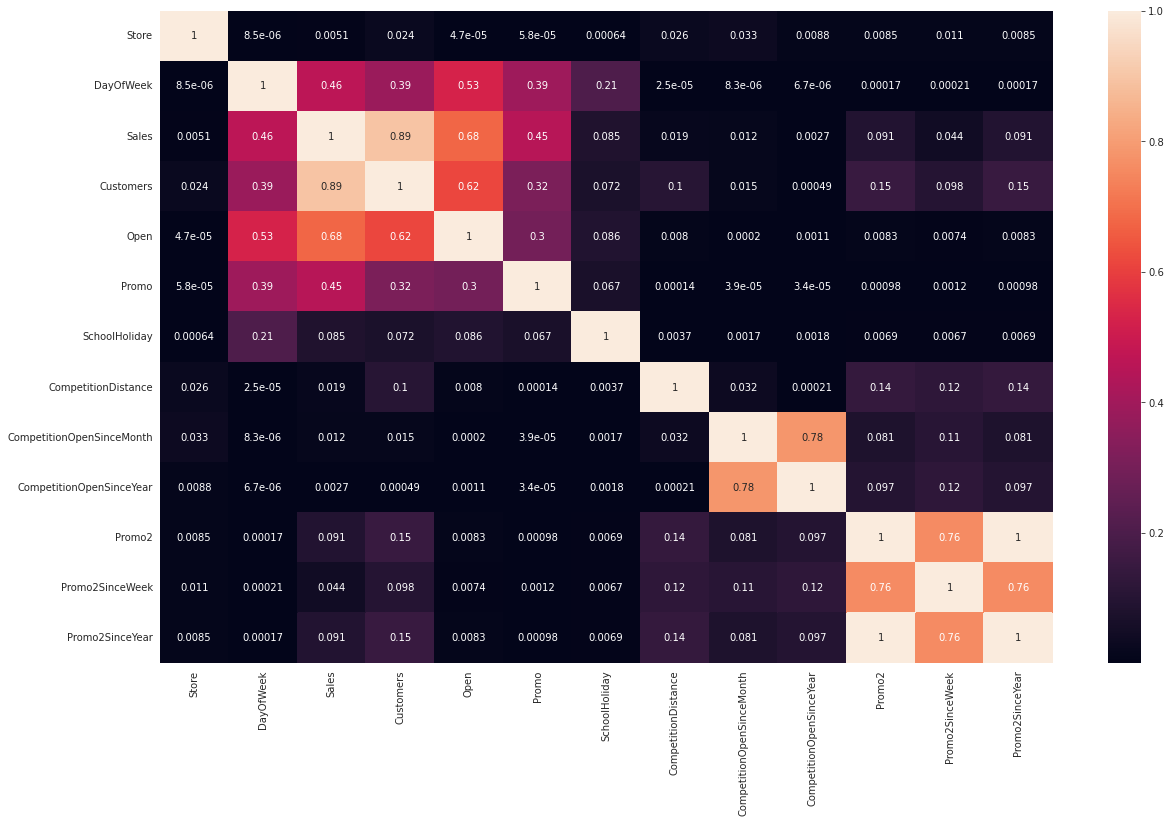

In [289]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)

Points to be noted are:-
1.   Sales and Customer are most highly correlated since both are based on demand and supply of various product
2.   CompetitonOpenSinceYear and CompetitionOpenSinceMonth has the second highest correlation which is obvious as both are analysis are based market grasping.
3.   Various kind of promos are third in correlation matrix which is because of same type of data regarding the discount provided by the stores. 
3.   Dayofweek,sales,customers,open,promo these are medium in correlation excluding sales and customers.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [255]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [256]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [257]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [258]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [259]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [260]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [261]:
# Expand Contraction

#### 2. Lower Casing

In [262]:
# Lower Casing

#### 3. Removing Punctuations

In [263]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [264]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [265]:
# Remove Stopwords

In [266]:
# Remove White spaces

#### 6. Rephrase Text

In [267]:
# Rephrase Text

#### 7. Tokenization

In [268]:
# Tokenization

#### 8. Text Normalization

In [269]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [270]:
# POS Taging

#### 10. Text Vectorization

In [271]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [272]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [273]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [274]:
# Transform Your data

### 6. Data Scaling

In [275]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [276]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [277]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [278]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [279]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [280]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [281]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [282]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [283]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [284]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [285]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [286]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [287]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [288]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***